In [52]:
import numpy as np # Cómputo numérico
from sympy import Matrix, symbols, log, simplify # Cómputo simbólico
import matplotlib.pyplot as plt
import pandas as pd

# Clasificadores

### Clasificador euclideano determinista a priori

In [53]:
def clasif_e(samples):
    # Vector genérico usando Sympy
    X = Matrix([symbols('x' + str(i+1)) for i in range(samples[0].shape[0])])
    print(' Variables : ', X)
    fds = []
    for s in samples:
        m = Matrix(np.mean(s, axis=1))
        fds.append(simplify(X.T*m - (m.T*m)/2))
    return fds

In [54]:
w1 = np.array([[1,5,6,1],[2,3,4,-2],[0,1,5,3],[1,3,5,2]]).T
w2 = np.array([[6,8,-1,6],[7,9,3,6],[8,7,1,9]]).T
samples = (w1,w2)
fds = clasif_e(samples)
print(fds)
display(fds[0])
display(fds[1])
for fd in range(len(fds)):
    print('fd' + str(fd+1) + ': ', fds[fd].evalf(subs={'x1':3, 'x2':1, 'x3':3, 'x4':1}))

 Variables :  Matrix([[x1], [x2], [x3], [x4]])
[Matrix([[1.0*x1 + 3.0*x2 + 5.0*x3 + 1.0*x4 - 18.0]]), Matrix([[7.0*x1 + 8.0*x2 + 1.0*x3 + 7.0*x4 - 81.5]])]


Matrix([[1.0*x1 + 3.0*x2 + 5.0*x3 + 1.0*x4 - 18.0]])

Matrix([[7.0*x1 + 8.0*x2 + 1.0*x3 + 7.0*x4 - 81.5]])

fd1:  Matrix([[4.00000000000000]])
fd2:  Matrix([[-42.5000000000000]])


### Tarea

Obtener las funciones discriminantes para las muestras:

$$ \omega_1 =  \{(0.5, 10.5),(1, 12.5),(3, 10.5),(3, 12.5),(3, 14.5),(3, 18),(5, 18),(5, 16),(5, 14.5),(5, 13)\} $$

$$ \omega_2 = \{(6, 9),(8, 10),(9, 11),(8.5, 12),(7, 13.5),(8, 16)\} $$

Para calcular el centroide de las muestras, se calcula la media de cada fila.

$$ \omega_1 = \left\{ \begin{pmatrix} 0.5 \\ 10.5 \end{pmatrix},  \begin{pmatrix} 1 \\ 12.5 \end{pmatrix}, \begin{pmatrix} 3 \\ 10.5 \end{pmatrix}, \begin{pmatrix} 3 \\ 12.5 \end{pmatrix}, \begin{pmatrix} 3 \\ 14.5 \end{pmatrix},\begin{pmatrix} 3 \\ 18 \end{pmatrix},\begin{pmatrix} 5 \\ 18 \end{pmatrix},\begin{pmatrix} 5 \\ 16 \end{pmatrix},\begin{pmatrix} 5 \\ 14.5 \end{pmatrix},\begin{pmatrix} 5 \\ 13 \end{pmatrix} \right\} $$

$$ \omega_2 = \left\{ \begin{pmatrix} 6 \\ 9 \end{pmatrix},  \begin{pmatrix} 8 \\ 10 \end{pmatrix}, \begin{pmatrix} 9 \\ 11 \end{pmatrix}, \begin{pmatrix} 8.5 \\ 12 \end{pmatrix}, \begin{pmatrix} 7 \\ 13.5 \end{pmatrix}, \begin{pmatrix} 8 \\ 16 \end{pmatrix} \right\} $$

Los centroides de las dos clases son:

In [55]:
omega1 = np.array([[0.5, 10.5],[1, 12.5],[3, 10.5],[3, 12.5],[3, 14.5],[3, 18],[5, 18],[5, 16],[5, 14.5],[5, 13]]).T
omega2 = np.array([[6, 9],[8, 10],[9, 11],[8.5, 12],[7, 13.5],[8, 16]]).T
z_1 = np.mean(omega1, axis=1)
z_2 = np.mean(omega2, axis=1)
print(z_1)
print(z_2)

[ 3.35 14.  ]
[ 7.75       11.91666667]


$$ z_1 = \left\{ \begin{pmatrix} 3.35 \\ 14 \end{pmatrix} \right\} $$

$$ z_2 = \left\{ \begin{pmatrix} 7.75 \\ 11.9166 \end{pmatrix} \right\} $$

Las funciones discrimantes son:

$$ fd_K(X) = X^T \cdot Z_K - \frac{1}{2} \cdot Z^T_K \cdot Z_K \quad \quad \forall k \in K  $$

$$ fd_1(X) = X^T \cdot \begin{pmatrix} 3.35 \\ 14 \end{pmatrix} - \frac{1}{2} \cdot \begin{pmatrix} 3.35 \\ 14 \end{pmatrix}^T \cdot \begin{pmatrix} 3.35 \\ 14 \end{pmatrix} $$

$$ fd_2(X) = X^T \cdot \begin{pmatrix} 7.75 \\ 11.9166 \end{pmatrix} - \frac{1}{2} \cdot \begin{pmatrix} 7.75 \\ 11.9166 \end{pmatrix}^T \cdot \begin{pmatrix} 7.75 \\ 11.9166 \end{pmatrix} $$

Desarrollando las operaciones:

$$ fd_1 (X) = 3.35 x_1 +14 x_2 - 103.611 $$

$$ fd_2(X) = 7.75 x_1 + 11.9166 x_2 - 101.033 $$

In [56]:
samples = (omega1, omega2)
fds = clasif_e(samples)
print(fds)

 Variables :  Matrix([[x1], [x2]])
[Matrix([[3.35*x1 + 14.0*x2 - 103.61125]]), Matrix([[7.75*x1 + 11.9166666666667*x2 - 101.034722222222]])]


In [57]:
# fd1
display(fds[0])
# fd2
display(fds[1])

Matrix([[3.35*x1 + 14.0*x2 - 103.61125]])

Matrix([[7.75*x1 + 11.9166666666667*x2 - 101.034722222222]])

# Clasificador con distancia de Mahalanobis

In [58]:
def clasif_m(samples):
    X = Matrix([symbols('x' + str(i+1)) for i in range(samples[0].shape[0])])
    print('Variables: ', X)
    fds = []
    for s in samples:
        m = Matrix(np.mean(s, axis=1))
        m_cov = np.cov(s, bias=True)
        # print(m_cov)
        m_ci = Matrix(m_cov).inv()
        fds.append(simplify((X.T*m_ci*X)/-2 + X.T*m_ci*m - (m.T*m_ci*m)/2 - Matrix([log(m_ci.det())/2])))
    return fds

In [59]:
w1 = np.array([[1,2],[2,2],[3,1],[2,3],[3,2]]).T
w2 = np.array([[8,10],[9,8],[9,9],[8,9],[7,9]]).T
samples = (w1,w2)
fds = clasif_m(samples)
print(fds)

Variables:  Matrix([[x1], [x2]])
[Matrix([[-1.08695652173913*x1**2 - 1.08695652173913*x1*x2 + 6.95652173913044*x1 - 1.52173913043478*x2**2 + 8.47826086956522*x2 - 16.9768445432953]]), Matrix([[-1.08695652173913*x1**2 - 1.08695652173913*x1*x2 + 27.6086956521739*x1 - 1.52173913043478*x2**2 + 36.304347826087*x2 - 277.411627151991]])]


In [60]:
display(fds[0])
display(fds[1])

Matrix([[-1.08695652173913*x1**2 - 1.08695652173913*x1*x2 + 6.95652173913044*x1 - 1.52173913043478*x2**2 + 8.47826086956522*x2 - 16.9768445432953]])

Matrix([[-1.08695652173913*x1**2 - 1.08695652173913*x1*x2 + 27.6086956521739*x1 - 1.52173913043478*x2**2 + 36.304347826087*x2 - 277.411627151991]])

### Tarea
Obtener las funciones discriminantes para las muestras:
$$ \omega_1 = \{ (0.5, 10.5),(1, 12.5),(3, 10.5),(3, 12.5),(3, 14.5),(3, 18),(5, 18),(5, 16),(5, 14.5),(5, 13) \} $$

$$ \omega_2 = \{ (6, 9),(8, 10),(9, 11),(8.5, 12),(7, 13.5) (8, 16) \} $$

**Nota:** Las matrices de covarianzas no son iguales: se obtendrán funciones discriminantes
cónicas.

$$ \omega_1 = \left\{ \begin{pmatrix} 0.5 \\ 10.5 \end{pmatrix},  \begin{pmatrix} 1 \\ 12.5 \end{pmatrix}, \begin{pmatrix} 3 \\ 10.5 \end{pmatrix}, \begin{pmatrix} 3 \\ 12.5 \end{pmatrix}, \begin{pmatrix} 3 \\ 14.5 \end{pmatrix}, \begin{pmatrix} 3 \\ 18 \end{pmatrix}, \begin{pmatrix} 5 \\ 18 \end{pmatrix}, \begin{pmatrix} 5 \\ 16 \end{pmatrix}, \begin{pmatrix} 5 \\ 14.5 \end{pmatrix}, \begin{pmatrix} 5 \\ 13 \end{pmatrix} \right\} $$

$$ \omega_2 = \left\{ \begin{pmatrix} 6 \\ 9 \end{pmatrix},  \begin{pmatrix} 8 \\ 10 \end{pmatrix}, \begin{pmatrix} 9 \\ 11 \end{pmatrix}, \begin{pmatrix} 8.5 \\ 12 \end{pmatrix}, \begin{pmatrix} 7 \\ 13.5 \end{pmatrix}, \begin{pmatrix} 8 \\ 16 \end{pmatrix} \right\} $$

Las medias (el cálculo es análogo al del centroide) son:

In [61]:
m_1 = np.mean(omega1, axis=1)
m_2 = np.mean(omega2, axis=1)
print(m_1)
print(m_2)

[ 3.35 14.  ]
[ 7.75       11.91666667]


$$ \vec{m}_1 = \begin{pmatrix} 3.35 \\ 14 \end{pmatrix}$$

$$ \vec{m}_2 = \begin{pmatrix} 7.75 \\ 11.9166 \end{pmatrix}$$

Las matrices de covarianzas:

$$ c11 = \frac{1}{10} ((0.5-3.35)^2 + (1-3.35)^2 + (3-3.35)^2 + \cdots + (5-3.35)^2)$$ 
$$ c11 = 2.5025$$

$$ c12 = c21 = \frac{1}{10}((0.5-3.35)(10.5-14)+(1-3.35)(12.5-14)+(3-3.35)(10.5-14) + \cdots + (5-3.35)(13-14))$$
$$ c12 = 2.275 $$

$$ c22 = \frac{1}{10} ((10.5-14)^2 + (12.5-14)^2 + (10.5-14)^2 + \cdots + (13-14)^2)$$ 
$$ c22 = 6.65 $$

$$ C_1 = \begin{pmatrix}
2.5025 & 2.275 \\
2.275 & 6.65 \\
\end{pmatrix} $$

In [62]:
cov_1 = np.cov(omega1, bias=True)
cov_1

array([[2.5025, 2.275 ],
       [2.275 , 6.65  ]])

---

$$ c11 = \frac{1}{10} ((6-7.75)^2 + (8-7.75)^2 + (9-7.75)^2 + \cdots + (8-7.75)^2)$$ 
$$ c11 = 0.979166$$

$$ c12 = c21 = \frac{1}{10}((6-7.75)(9-11.9166) + (8-7.75)(10-11.9166) + (9-7.75)(11-11.9166) + \cdots + (8-7.75)(16-11.9166))$$
$$ c12 = 0.562499 $$

$$ c22 = \frac{1}{10} ((9-11.9166)^2 + (10-11.9166)^2 + (11-11.9166)^2 + \cdots + (16-11.9166)^2)$$ 
$$ c22 = 5.368055 $$

$$ C_2 = \begin{pmatrix}
0.979166 & 0.562499 \\
0.562499 & 5.368055 \\
\end{pmatrix} $$

In [63]:
cov_2 = np.cov(omega2, bias=True)
cov_2

array([[0.97916667, 0.5625    ],
       [0.5625    , 5.36805556]])

Las inversas de las matrices de covarianzas:

In [64]:
cov_1_inv = np.linalg.inv(cov_1)
cov_2_inv = np.linalg.inv(cov_2)
print(cov_1_inv)
print(cov_2_inv)

[[ 0.57997558 -0.1984127 ]
 [-0.1984127   0.21825397]]
[[ 1.08669166 -0.11387067]
 [-0.11387067  0.19821931]]


$$ C^{-1}_1 =  \begin{pmatrix} 0.57997558 & -0.1984127 \\ -0.1984127 & 0.21825397 \\ \end{pmatrix} $$

$$ C^{-1}_2 =  \begin{pmatrix} 1.08669221 & -0.11387053 \\ -0.11387053 & 0.19821929 \\ \end{pmatrix} $$

Los determinantes:

In [65]:
det_c1 = np.linalg.det(cov_1)
det_c2 = np.linalg.det(cov_2)
print(det_c1)
print(det_c2)

11.466
4.939814814814815


$$ |C_1| = 11.466$$

$$ |C_2| = 4.939814814814815$$


Las funciones discriminantes son:

$$ fd_i(X) = -\frac{1}{2} X^T \cdot C^{-1}_i \cdot X + X^T \cdot C^{-1}_i \cdot \vec{m}_i - \frac{1}{2} \vec{m}^T_i \cdot C^{-1}_i \cdot \vec{m}_i - \frac{1}{2} \ln |C_i| $$

$$ fd_1(X) = -\frac{1}{2} X^T \cdot C^{-1}_1 \cdot X + X^T \cdot C^{-1}_1 \cdot \vec{m}_1 - \frac{1}{2} \vec{m}^T_1 \cdot C^{-1}_1 \cdot \vec{m}_1 - \frac{1}{2} \ln |C_1| $$

$$ fd_1  = -1.08695652173913 x_1^2 - 1.08695652173913 x_1x_2 + 6.95652173913044 x_1 - 1.52173913043478 x_2^2 + 8.47826086956522 x_2 - 16.9768445432953$$

$$ fd_2(X) = -\frac{1}{2} X^T \cdot C^{-1}_2 \cdot X + X^T \cdot C^{-1}_2 \cdot \vec{m}_2 - \frac{1}{2} \vec{m}^T_2 \cdot C^{-1}_i \cdot \vec{m}_2 - \frac{1}{2} \ln |C_2| $$

$$ fd_2 = -1.08695652173913 x_1^2 - 1.08695652173913 x_1x_2 + 27.6086956521739 x_1 - 1.52173913043478 x_2^2 + 36.304347826087 x_2 - 277.411627151991$$

In [66]:
samples = (omega1,omega2)
fds = clasif_m(samples)
print(fds)

Variables:  Matrix([[x1], [x2]])
[Matrix([[-0.28998778998779*x1**2 + 0.198412698412698*x1*x2 - 0.834859584859585*x1 - 0.109126984126984*x2**2 + 2.39087301587302*x2 - 14.1180282392282]]), Matrix([[-0.543345829428304*x1**2 + 0.113870665417057*x1*x2 + 7.06490159325211*x1 - 0.0991096532333646*x2**2 + 1.47961574507966*x2 - 35.3938735664761]])]


In [67]:
display(fds[0])
display(fds[1])

Matrix([[-0.28998778998779*x1**2 + 0.198412698412698*x1*x2 - 0.834859584859585*x1 - 0.109126984126984*x2**2 + 2.39087301587302*x2 - 14.1180282392282]])

Matrix([[-0.543345829428304*x1**2 + 0.113870665417057*x1*x2 + 7.06490159325211*x1 - 0.0991096532333646*x2**2 + 1.47961574507966*x2 - 35.3938735664761]])

# Neuronas artificiales y el modelo de McCulloch-Pitts

### Perceptron de Frank Rosenblatt

In [68]:
class Perceptron():
    """
    Perceptron

    Parameters
    ----------
    eta: float
        Learning rate (between 0.0 and 1.0)
    n_iter: int
        Number of iterations over the training dataset
    random_state: int
        Random number generator seed for random weight initialization
    
    Attributes
    ----------
    w_: 1d-array
        Weights after fitting
    errors_: 1d-array
        Number of misclassifications (updates) in each epoch
    """
    def __init__(self, eta=0.1, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """
        Fit training data

        Parameters
        ----------
        X: {np.array}, shape = [n_samples, m_features]
            Training vectors, where n_samples is the number of samples and m_features is the number of features
        y: {np.array}, shape = [n_samples]
            Target values
        """
        rgen = np.random.RandomState(self.random_state)
        if self.random_state is None:
            self.w_ = np.zeros(1 + len(X[0]))
        else:
            self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, yi in zip(X, y):
                update = self.eta * (yi - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
            print(f'weights: {self.w_}')
            print(f"Epoch {_ + 1}: {errors} errors")
        return self
    
    def net_input(self, X):
        """
        Calculate net input

        Parameters
        ----------
        X: {np.array}, shape = [n_samples, m_features]
            Training vectors, where n_samples is the number of samples and m_features is the number of features

        Returns
        -------
        net_input: float
            Net input
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """
        Returns class label after unit step

        Parameters
        ----------
        X: {np.array}, shape = [n_samples, m_features]
            Training vectors, where n_samples is the number of samples and m_features is the number of features

        Returns
        -------
        class: int
            Predicted class label
        """
        return np.where(self.net_input(X) >= 0.0, 1, -1)

![Perceptron](img/perceptron.png "Perceptron")

**Función escalón unitario**

Definimos una función de activación $g(z)$ que toma una combinación lineal de las entradas $x$ y los pesos $\omega$ como entrada $z=\omega_1 x_1+\cdots+\omega_n x_n$ y, si $g(z)$ es mayor que el umbral definido $\theta$, se obtiene 1 y -1 en otro caso.

$$g(z)=\begin{cases}
1 & \text{ si } z\geq\theta \\
-1 & \text{ en otro caso } 
\end{cases}$$

con $z=\omega_1x_1+\cdots+\omega_nx_n=\sum_{i=1}^{n}\omega_ix_i$

Además, se suele definir $\omega_0 = \theta$ y $x_0=1$. De este modo:

 $$g(z)=\begin{cases}
1 & \text{ si } z\geq\theta \\
-1 & \text{ en otro caso } 
\end{cases}$$

con $z=\omega_0x_0+\omega_1x_1\cdots+\omega_nx_n=\sum_{i=0}^{n}\omega_ix_i$

--------------

**Algorithm 1.1** Regla del perceptrón de Rosenblatt

--------------

Inicializar los pesos a 0 o en un número aleatorio *pequeño*

Para cada muestra de entrenamiento $x^{(i)}$:
+ Calcular el valor de salida $\hat{y}^{(i)}$
+ Actualizar pesos

El valor de salida es el predicho por la función escalón definida previamente y la actualización del peso se obtiene mediante la regla de aprendizaje:

$$ \Delta\omega_j = \eta(y^{{i}}-\hat{y}^{(i)}) $$

Donde $\eta$ es la tasa (razón) de aprendizaje (una constante entre 0.0 y 1.0); $y^{(i)}$ es la clase a la que pertenece la muestra, y $\hat{h}^{(i)}$ es la salida que predice el perceptrón en el paso actual. Es importante notar que el vector de pesos se actualiza *simultáneamente*.

En particular, para un conjunto de datos de 2 dimensiones, la actualización se obtiene como:

$$\Delta\omega_0 = \eta(y^{(i)}-\hat{y}^{(i)})$$
$$\Delta\omega_1 = \eta(y^{(i)}-\hat{y}^{(i)})x_1^{(i)}$$
$$\Delta\omega_2 = \eta(y^{(i)}-\hat{y}^{(i)})x_2^{(i)}$$

#### **Ejemplo, tarea**

Utilizando el valor $\eta=0.1$, aplicar el algoritmo de aprendizaje del perceptrón para una neurona artificial que calcule la función booleana NAND con 2 parámetros definida como:

| $x_1$ | $x_2$ | $y$ |
|-------|-------|-----|
| 0     | 0     | 1   |
| 0     | 1     | 1   |
| 1     | 0     | 1   |
| 1     | 1     | -1  |


In [69]:
X = np.array([[0 ,0] ,[0 ,1] ,[1 ,0] ,[1 ,1]])
y = np.array([1 ,1 ,1 , -1])

ppn = Perceptron(n_iter=6, eta=0.1)
ppn.fit(X, y)
print('\nPesos : %s ' % ppn . w_ )


weights: [-0.18375655 -0.20611756 -0.20528172]
Epoch 1: 1 errors
weights: [ 0.01624345 -0.40611756 -0.20528172]
Epoch 2: 3 errors
weights: [ 0.21624345 -0.40611756 -0.20528172]
Epoch 3: 3 errors
weights: [ 0.21624345 -0.40611756 -0.40528172]
Epoch 4: 2 errors
weights: [ 0.41624345 -0.40611756 -0.20528172]
Epoch 5: 1 errors
weights: [ 0.41624345 -0.40611756 -0.20528172]
Epoch 6: 0 errors

Pesos : [ 0.41624345 -0.40611756 -0.20528172] 


Con los pesos inicializados a 0:

In [70]:
X = np.array([[0 ,0] ,[0 ,1] ,[1 ,0] ,[1 ,1]])
y = np.array([1 ,1 ,1 , -1])

ppn = Perceptron(n_iter=6, eta=0.1, random_state=None)
ppn.fit(X, y)
print('\nPesos : %s ' % ppn . w_ )

weights: [-0.2 -0.2 -0.2]
Epoch 1: 1 errors
weights: [ 0.  -0.4 -0.2]
Epoch 2: 3 errors
weights: [ 0.2 -0.4 -0.2]
Epoch 3: 3 errors
weights: [ 0.2 -0.4 -0.4]
Epoch 4: 2 errors
weights: [ 0.4 -0.4 -0.2]
Epoch 5: 1 errors
weights: [ 0.4 -0.4 -0.2]
Epoch 6: 0 errors

Pesos : [ 0.4 -0.4 -0.2] 


NAND de 3 dimensiones

In [71]:
X = np.array([[0 ,0, 1] ,[0 ,1, 0] ,[1 ,0, 0] ,[1 ,0, 1], [1, 1, 1]]) #nand 3D
y = np.array([1 ,1 ,1 , 1, -1])

ppn = Perceptron(n_iter=10, eta=0.1, random_state=None)
ppn.fit(X, y)
print('\nPesos : %s ' % ppn . w_ )

weights: [-0.2 -0.2 -0.2 -0.2]
Epoch 1: 1 errors
weights: [ 0.  -0.4 -0.2 -0.2]
Epoch 2: 3 errors
weights: [ 0.2 -0.4 -0.4 -0.2]
Epoch 3: 3 errors
weights: [ 0.4 -0.4 -0.4 -0.2]
Epoch 4: 3 errors
weights: [ 0.4 -0.4 -0.6 -0.2]
Epoch 5: 2 errors
weights: [ 0.6 -0.4 -0.4 -0.2]
Epoch 6: 1 errors
weights: [ 0.6 -0.4 -0.4 -0.2]
Epoch 7: 0 errors
weights: [ 0.6 -0.4 -0.4 -0.2]
Epoch 8: 0 errors
weights: [ 0.6 -0.4 -0.4 -0.2]
Epoch 9: 0 errors
weights: [ 0.6 -0.4 -0.4 -0.2]
Epoch 10: 0 errors

Pesos : [ 0.6 -0.4 -0.4 -0.2] 


In [72]:
ppn.predict(np.array([0, 0, 0])) # Predecir el vector [0, 0, 0]

array(1)

#### Conjunto de datos Iris

In [73]:
df = pd.read_csv("https://bit.ly/38XWXS4",header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [74]:
X = df.iloc[0:100,[0,2]].values
y = df.iloc[0:100,4].values # Etiquetas en texto
y = np.where(y == "Iris-setosa",-1,1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

Exploratory Data Análisis

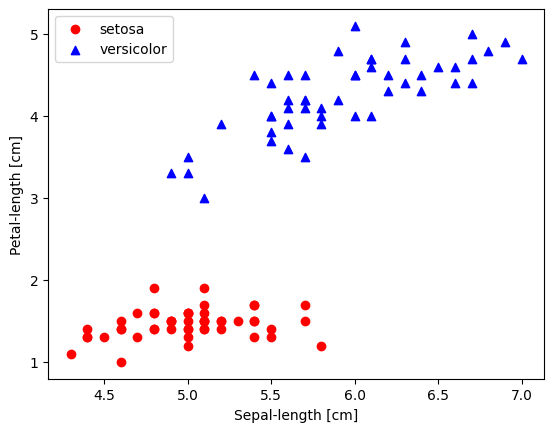

In [75]:
plt.scatter(X[:50,0],X[:50,1],color ='red',marker='o',label='setosa')
plt.scatter(X[50:,0],X[50:,1],color ='blue',marker='^',label='versicolor')
plt.xlabel('Sepal-length [cm]')
plt.ylabel('Petal-length [cm]')
plt.legend(loc='upper left')
plt.show()

weights: [0.21624345 1.39388244 0.93471828]
Epoch 1: 1 errors
weights: [0.01624345 0.79388244 1.31471828]
Epoch 2: 3 errors
weights: [-0.18375655  0.19388244  1.69471828]
Epoch 3: 3 errors
weights: [-0.18375655  0.31388244  2.11471828]
Epoch 4: 2 errors
weights: [-0.38375655 -0.70611756  1.83471828]
Epoch 5: 1 errors
weights: [-0.38375655 -0.70611756  1.83471828]
Epoch 6: 0 errors
weights: [-0.38375655 -0.70611756  1.83471828]
Epoch 7: 0 errors
weights: [-0.38375655 -0.70611756  1.83471828]
Epoch 8: 0 errors
weights: [-0.38375655 -0.70611756  1.83471828]
Epoch 9: 0 errors
weights: [-0.38375655 -0.70611756  1.83471828]
Epoch 10: 0 errors


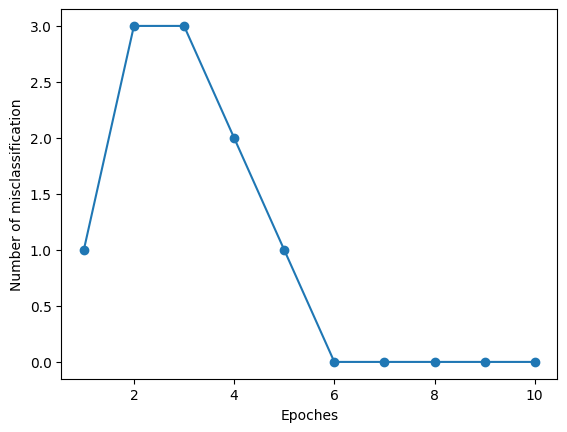

In [76]:
# initial Perception
ppn = Perceptron(eta=0.1,n_iter=10)
ppn.fit(X,y)

plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_, marker='o')
plt.xlabel('Epoches')
plt.ylabel('Number of misclassification')
plt.show()

In [77]:
print('Weights: ', ppn.w_)

Weights:  [-0.38375655 -0.70611756  1.83471828]


Para dibujar una línea que marque el límite de las clases, recordamos que el perceptrón realiza la operación:

$$\omega_0x_0+\omega_1x_1+\omega_2x_2$$

Como la característica de sesgo (*bias*) está definida como $x_0=1$, podemos despejar a $x_2$, obteniendo:

$$w_0 + w_1x_1 + w_2x_2 = 0$$

$$\Rightarrow x_2 = -(w_0 + w_1x_1) / w_2$$

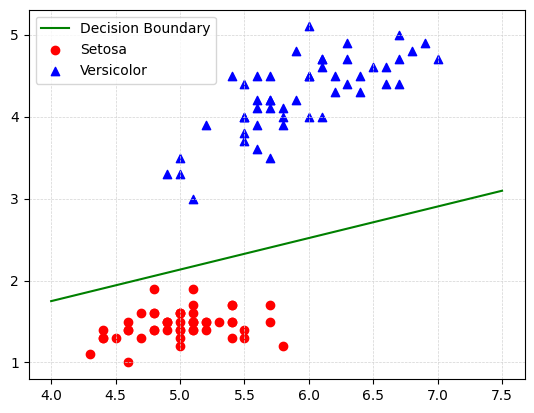

In [78]:
# Decision boundary
x1 = np.linspace(4, 7.5, 2)
x2 = - (ppn.w_[0] + ppn.w_[1]*x1) / ppn.w_[2]
plt.plot(x1, x2, color='green', label='Decision Boundary')
# Clase -1: Setosa
registros = y == -1
x1 = X[registros][:,0]
x2 = X[registros][:,1]
plt.scatter(x1, x2, color='red', marker='o', label='Setosa')
# Clase 1: Versicolor
registros = y == 1
x1 = X[registros][:,0]
x2 = X[registros][:,1]
plt.scatter(x1, x2, color='blue', marker='^', label='Versicolor')
plt.legend()
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)

In [79]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    colors = np.array(['lime', 'red', 'blue'])
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # Decision surface
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # Class samples
    plt.scatter(X[:,0], X[:,1], alpha=0.9, c=colors[y], edgecolors='black')

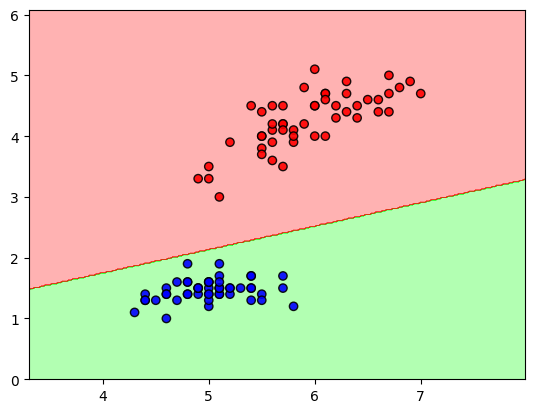

In [80]:
plot_decision_regions(X, y, classifier=ppn)

In [81]:
from mlxtend.plotting import plot_decision_regions

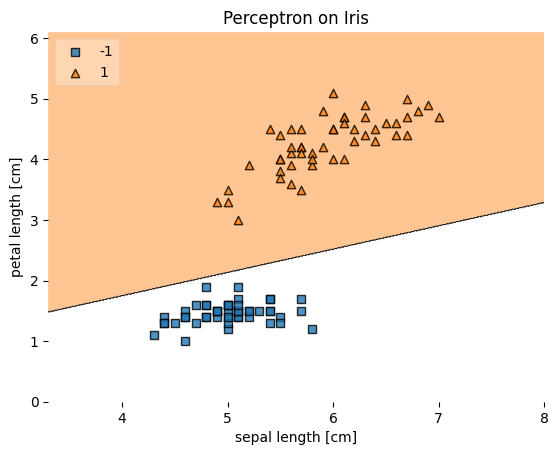

In [82]:
plot_decision_regions(X, y, clf=ppn, legend=2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Perceptron on Iris')
plt.show()

# Scikit Learn

In [83]:
from sklearn import datasets

In [84]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [85]:
# sepal length, petal length
X = iris.data[:, [2, 3]]
# target : 0, 1, 2 (setosa, versicolor, virginica)
y = iris.target[:]
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


#### Separar los datos en conjuntos de entrenamiento y pruebas

In [86]:
from sklearn.model_selection import train_test_split 
# 30% test data, 70% training data
# stratify=y means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
# random_state=1 means that the method will return the same training and test subsets if the same random_state is used in the function.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(105, 2) (105,)
(45, 2) (45,)


In [87]:
print('Etiquetas en y       :', np.bincount(y))
print('Etiquetas en y_train :', np.bincount(y_train))
print('Etiquetas en y_test  :', np.bincount(y_test))
# Estratificacion: Las muestras se toman en proporcion a las etiquetas

Etiquetas en y       : [50 50 50]
Etiquetas en y_train : [35 35 35]
Etiquetas en y_test  : [15 15 15]


#### Escalamiento de características

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
sc = StandardScaler()
# Computes the mean and standard deviation for the training data
sc.fit(X_train)
# Standardizes the training data
X_train_std = sc.transform(X_train)
# Golden Rule: Do not standardize the test data using the test set mean and standard deviation
# i.e. DO NOT sc.fit(X_test) and sc.transform(X_test
X_test_std = sc.transform(X_test)

### Perceptron

In [90]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

In [91]:
y_pred = ppn.predict(X_test_std) # y_hat
print('Missclassified samples : ', (y_test != y_pred).sum())

Missclassified samples :  1


In [92]:
# coefficient of the features in the decision function
ppn.coef_

array([[-0.10655204, -0.11836728],
       [ 0.31790327, -0.3670884 ],
       [ 0.36018414,  0.30003858]])

In [93]:
# Score is the accuracy of the model
print('Accuracy : ', ppn.score(X_test_std, y_test))

Accuracy :  0.9777777777777777


In [94]:
from sklearn.metrics import accuracy_score
# Exactitud
print('Accuracy : ', accuracy_score(y_test, y_pred))

Accuracy :  0.9777777777777777


#### Graficando las regiones de decision

In [95]:
from mlxtend.plotting import plot_decision_regions

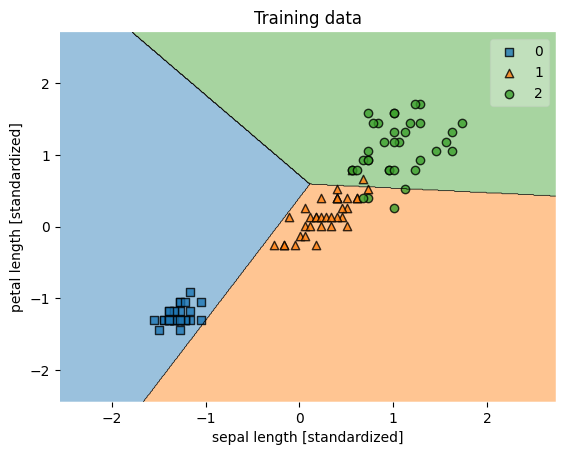

In [96]:
plot_decision_regions(X_train_std, y_train, clf=ppn)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.title('Training data')
plt.show()

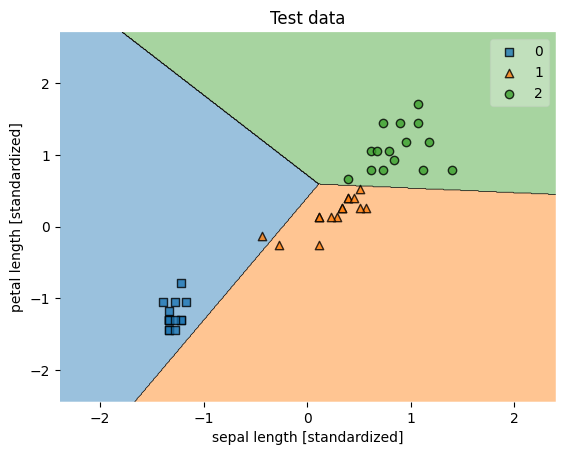

In [97]:
plot_decision_regions(X_test_std, y_test, clf=ppn)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.title('Test data')
plt.show()

### Regresión logística

![Regresión logística](img/reglog.png "Regresión logística")

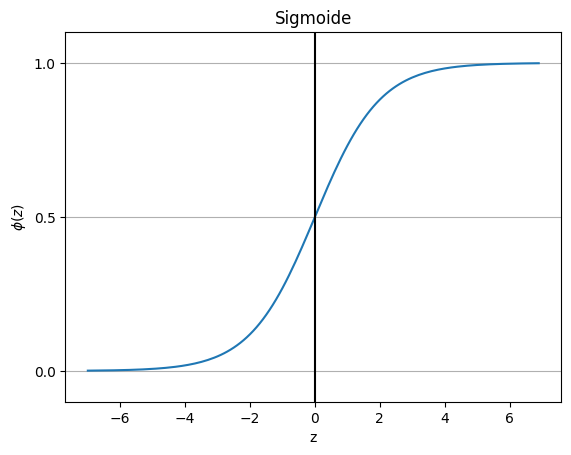

In [98]:
def sigmoide(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoide(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim ( -0.1 ,1.1)
plt.xlabel ('z')
plt.title('Sigmoide')
plt.xlabel('z')
plt.ylabel('$\\phi (z)$')
plt.yticks([0.0, 0.5, 1])
ax = plt.gca()
ax.yaxis.grid(True)
plt.show()

In [99]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, random_state=1)

In [100]:
y_pred = lr.predict(X_test_std)
print('Missclassified samples : ', (y_test != y_pred).sum())
print('Accuracy : ', lr.score(X_test_std, y_test))

Missclassified samples :  1
Accuracy :  0.9777777777777777


In [101]:
lr.coef_

array([[-6.94350471, -5.88178467],
       [-2.01585607,  0.03216446],
       [ 8.95936078,  5.84962021]])

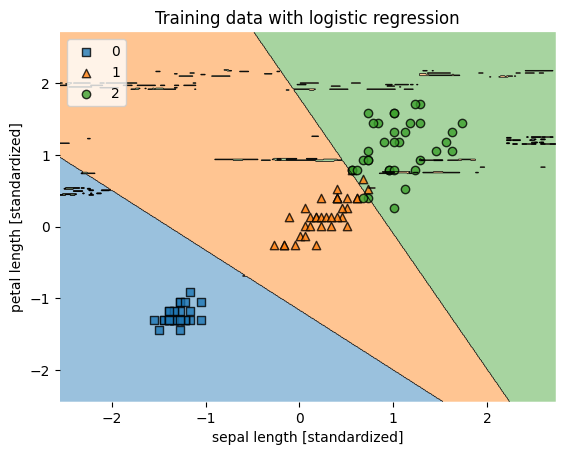

In [102]:
plot_decision_regions(X_train_std, y_train, clf=lr)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.title('Training data with logistic regression')
plt.legend(loc='upper left')
plt.show()

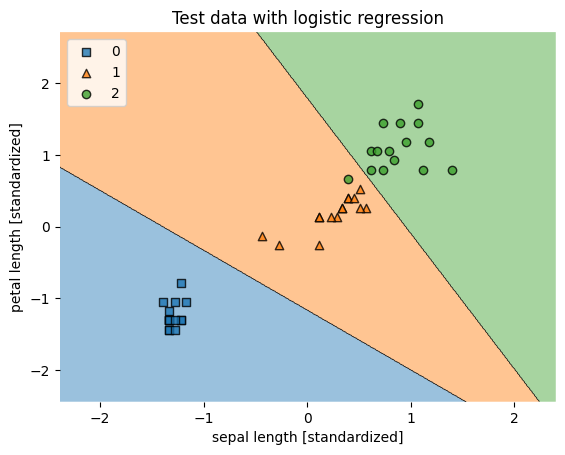

In [103]:
plot_decision_regions(X_test_std, y_test, clf=lr)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.title('Test data with logistic regression')
plt.legend(loc='upper left')
plt.show()

#### Elipses como separación de clases

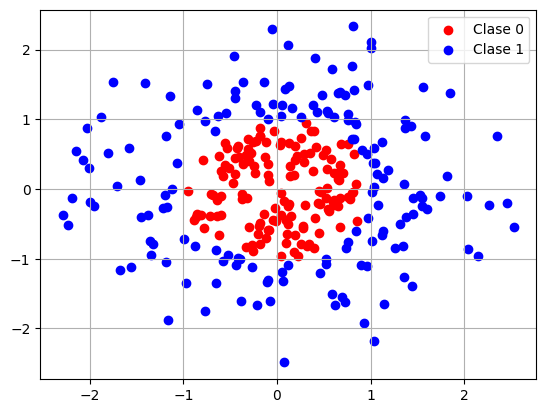

In [104]:
data = pd.read_csv('https://bit.ly/3BijEAo', header=0)
data.head ()
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
color = ['r', 'b']
for i , c in enumerate(color):
    registros = y == i
    x1 = X[registros][:, 0]
    x2 = X [ registros][:, 1]
    plt.scatter(x1, x2, c=c, label= 'Clase ' + str (i))
plt.legend()
plt.grid(True)
plt.show()

In [105]:
lr = LogisticRegression()
# Elipse a x1 **2 + b x2 **2 + c = 0
#       w1 x1 **2 + w2 x2 **2 + w0 = 0
# x2 = +/- sqrt((w0+w1x1**2)/w2)
lr.fit(X**2, y)
w_ = [*lr.intercept_, *lr.coef_[0]]
w_


[np.float64(-4.586345422365929),
 np.float64(4.356433128391477),
 np.float64(4.357257322100275)]

C:\Users\denis\AppData\Local\Temp\ipykernel_32800\621583822.py:2: RuntimeWarning: invalid value encountered in sqrt
  x2 = ((w_[0]+w_[1]*x1**2)/(-w_[2]))**(1/2)


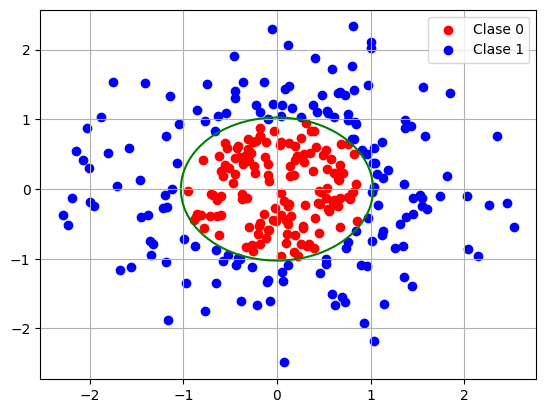

In [106]:
x1 = np.linspace(-(-w_[0]/w_[1])**(1/2), (-w_[0]/w_[1])**(1/2), 10000)
x2 = ((w_[0]+w_[1]*x1**2)/(-w_[2]))**(1/2)
x2n = -x2
plt.plot(x1, x2, 'g')
plt.plot(x1, x2n, 'g')
color = ['r', 'b']
for i, c in enumerate(color):
    registros = y == i
    x1 = X[registros][:, 0]
    x2 = X[registros][:, 1]
    plt.scatter(x1, x2, c=c, label= 'Clase ' + str(i))
plt.legend()
plt.grid(True)
plt.show()

### Support Vector Machines

#### Dataset

In [107]:
from sklearn.svm import SVC

iris = datasets.load_iris()
X = iris.data[:, [0,2]]
y = iris.target[:]


#### Training

In [108]:
svm = SVC(kernel='linear', C=0.5)
svm.fit(X, y)

SVC(C=0.5, kernel='linear')

#### Plot

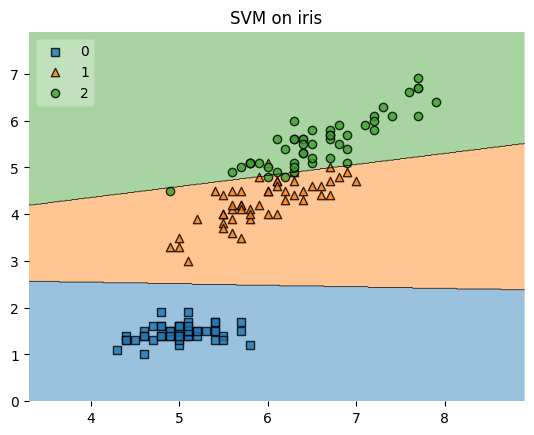

In [109]:
plot_decision_regions(X, y, clf=svm, legend=2)
plt.title('SVM on iris')
plt.show()